In [1]:
import ot
import numpy as np
import matplotlib.pyplot as plt

from mnist import MNIST
from barycenters.utils import create_digits_image

from barycenters import euclidean
from barycenters import wasserstein
from barycenters import kullback_leibler

In [2]:
# # Downloads the MNIST dataset
# !mkdir ./data
# !wget www.di.ens.fr/~lelarge/MNIST.tar.gz -P ./data
# !tar -zxvf ./data/MNIST.tar.gz -C ./data/

In [3]:
# Parameters
digit = 9
grid_size = 28
n_digits = 5
original_size = 20
is_distribution = True

In [4]:
data = MNIST(path='./data/MNIST/raw', return_type='numpy')
images, labels = data.load_training()
print(images.shape)
print(labels.shape)

(60000, 784)
(60000,)


In [5]:
images = images.astype(float).reshape(-1, 28, 28) / 255

In [6]:
B = create_digits_image(images, labels,
                        digit=digit,
                        n_digits=n_digits,
                        is_distribution=is_distribution)

(-0.5, 27.5, 27.5, -0.5)

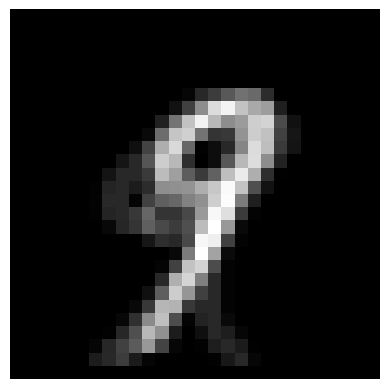

In [7]:
plt.imshow(sum(B).reshape(28, 28), cmap='gray')
plt.axis('off')

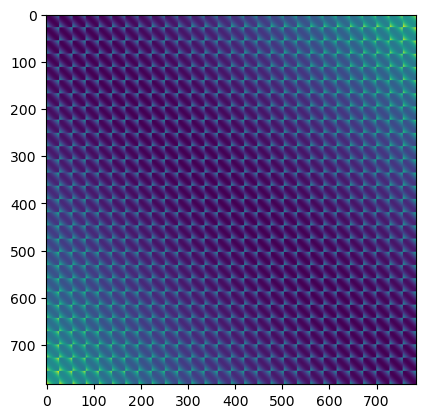

In [8]:
M = np.zeros([grid_size ** 2, grid_size ** 2])

for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            for l in range(grid_size):
                k1 = i * grid_size + j
                k2 = k * grid_size + l
                M[k1, k2] = (j - l) ** 2 + (i - k) ** 2
plt.imshow(M)

In [9]:
a_euclidean = euclidean.fixed_support_barycenter(B)

In [10]:
a_wasserstein = wasserstein.fixed_support_barycenter(B, M, verbose=True)

[0, 100] |da|: 0.2513970477318069
[1, 100] |da|: 0.19414989778161976
[2, 100] |da|: 0.15209299998798542
[3, 100] |da|: 0.11998280132020461
[4, 100] |da|: 0.0966180717573244
[5, 100] |da|: 0.07948362352013075
[6, 100] |da|: 0.0663966060529759
[7, 100] |da|: 0.05672361128053129
[8, 100] |da|: 0.04893653558822759
[9, 100] |da|: 0.04253059337716266
[10, 100] |da|: 0.03764206039567353
[11, 100] |da|: 0.03332155964233368
[12, 100] |da|: 0.02968017337574308
[13, 100] |da|: 0.0271369720162879
[14, 100] |da|: 0.025084016443989932
[15, 100] |da|: 0.023111777438054378
[16, 100] |da|: 0.02112006733246844
[17, 100] |da|: 0.019413992850372857
[18, 100] |da|: 0.01827375346035877
[19, 100] |da|: 0.017201002520308126
[20, 100] |da|: 0.01615507651888616
[21, 100] |da|: 0.015258549928994714
[22, 100] |da|: 0.014620125413858863
[23, 100] |da|: 0.01380001319749889
[24, 100] |da|: 0.013086958539375224
[25, 100] |da|: 0.012605456546192445
[26, 100] |da|: 0.012034272965063984
[27, 100] |da|: 0.011660130610403

In [11]:
a_kld = kullback_leibler.fixed_support_barycenter(B, eta=1e-5)

[0, 100] |da|: 0.008471070704999776
[1, 100] |da|: 0.008033337665934007
[2, 100] |da|: 0.007617205781496955
[3, 100] |da|: 0.007221640053957991
[4, 100] |da|: 0.006845658593672344
[5, 100] |da|: 0.00648832911312791
[6, 100] |da|: 0.006148765730092991
[7, 100] |da|: 0.005826126047577944
[8, 100] |da|: 0.005519608482536411
[9, 100] |da|: 0.005228449818333555
[10, 100] |da|: 0.004951922958911481
[11, 100] |da|: 0.00468933486544182
[12, 100] |da|: 0.004440024657793449
[13, 100] |da|: 0.004203361865456935
[14, 100] |da|: 0.003978744813892867
[15, 100] |da|: 0.00376559913349172
[16, 100] |da|: 0.0035633763800313007
[17, 100] |da|: 0.0033715527560219108
[18, 100] |da|: 0.0031896279233917103
[19, 100] |da|: 0.003017123899262923
[20, 100] |da|: 0.002853584026634247
[21, 100] |da|: 0.00269857201282627
[22, 100] |da|: 0.0025516710295089367
[23, 100] |da|: 0.0024124828677026086
[24, 100] |da|: 0.00228062714325131
[25, 100] |da|: 0.002155740546892063
[26, 100] |da|: 0.0020374761353474666
[27, 100] 

(-0.5, 27.5, 27.5, -0.5)

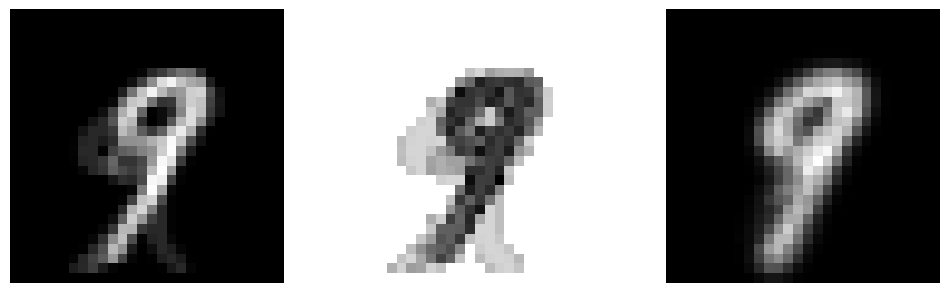

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(a_euclidean.reshape(grid_size, grid_size), cmap='gray')
axes[0].axis('off')

axes[1].imshow(a_kld.reshape(grid_size, grid_size), cmap='gray')
axes[1].axis('off')

axes[2].imshow(a_wasserstein.reshape(grid_size, grid_size), cmap='gray')
axes[2].axis('off')

In [13]:
res = wasserstein.evaluate(a_wasserstein, B[4], M)
print(res)


1.277178982307993


In [14]:
res = kullback_leibler.evaluate(a_kld, B[4], M)
print(res)

6.2690856356037274


In [15]:
res = euclidean.evaluate(a_euclidean, B[4])
print(res)

TypeError: evaluate() missing 1 required positional argument: 'M'